# MuscleHub A/B Test

## Description 

MuscleHub is a fancy gym.Currently, when a visitor to MuscleHub is considering buying a membership, he or she follows the following steps:
<ul>
    <li>Take a fitness test with a personal trainer</li>
    <li>Fill out an application for the gym</li>
    <li>Send in their payment for their first month’s membership</li>
</ul>

Janet, the manager of MuscleHub, thinks that the fitness test intimidates some prospective members, so she has set up an A/B test.Visitors will randomly be assigned to one of two groups:
<ul>
    <li>Group A will still be asked to take a fitness test with a personal trainer</li>
    <li>Group B will skip the fitness test and proceed directly to the application</li>
</ul>
Janet’s hypothesis is that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub.

## Objective

Help Janet from MuscleHub, to analyse data and run an A/B test to check if her hypothesis is correct.

## Files Used

- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

## Step 1: Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Step 2: Reading Datasets

In [2]:
visits = pd.read_csv('visits.csv')
fitness_tests = pd.read_csv('fitness_tests.csv')
applications = pd.read_csv('applications.csv')
purchases = pd.read_csv('purchases.csv')

## Step 3: Exploring Datasets 

In [3]:
#Examining visits
visits.head()

,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [4]:
visits.shape

(6000, 5)

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
first_name    6000 non-null object
last_name     6000 non-null object
email         6000 non-null object
gender        6000 non-null object
visit_date    6000 non-null object
dtypes: object(5)
memory usage: 234.5+ KB


In [6]:
#Converting visit_date to Date type
visits['visit_date'] = pd.to_datetime(visits['visit_date'])
visits.head()

,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,2017-05-01
1,Annette,Boone,AB9982@gmail.com,female,2017-05-01
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,2017-05-01
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,2017-05-01
4,Andre,Mayer,AndreMayer90@gmail.com,male,2017-05-01


In [7]:
#Examining applications
applications.head()

,first_name,last_name,email,gender,application_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [8]:
applications.shape

(575, 5)

In [9]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 5 columns):
first_name          575 non-null object
last_name           575 non-null object
email               575 non-null object
gender              575 non-null object
application_date    575 non-null object
dtypes: object(5)
memory usage: 22.5+ KB


In [10]:
#Converting application_date to datetime
applications['application_date'] = pd.to_datetime(applications['application_date'])
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 5 columns):
first_name          575 non-null object
last_name           575 non-null object
email               575 non-null object
gender              575 non-null object
application_date    575 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 22.5+ KB


In [11]:
#Examining fitness_tests
fitness_tests.head()

,first_name,last_name,email,gender,fitness_test_date
0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [12]:
fitness_tests.shape

(2500, 5)

In [13]:
fitness_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
first_name           2500 non-null object
last_name            2500 non-null object
email                2500 non-null object
gender               2500 non-null object
fitness_test_date    2500 non-null object
dtypes: object(5)
memory usage: 97.7+ KB


In [14]:
#Converting fitness_test_date to datetime
fitness_tests['fitness_test_date'] = pd.to_datetime(fitness_tests['fitness_test_date'])
fitness_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
first_name           2500 non-null object
last_name            2500 non-null object
email                2500 non-null object
gender               2500 non-null object
fitness_test_date    2500 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 97.7+ KB


In [15]:
#Examining purchases
purchases.head()

,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


In [16]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
first_name       450 non-null object
last_name        450 non-null object
email            450 non-null object
gender           450 non-null object
purchase_date    450 non-null object
dtypes: object(5)
memory usage: 17.7+ KB


In [17]:
#Converting purchase_date to datetime
purchases['purchase_date'] = pd.to_datetime(purchases['purchase_date'])
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
first_name       450 non-null object
last_name        450 non-null object
email            450 non-null object
gender           450 non-null object
purchase_date    450 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 17.7+ KB


## Step 4: Merging Datasets 

In [18]:
df = visits.merge(fitness_tests, how = 'left', on = ['first_name', 'last_name', 'email'])\
      .merge(applications, how = 'left', on = ['first_name', 'last_name', 'email'])\
      .merge(purchases, how = 'left', on = ['first_name', 'last_name', 'email'])
df.head()

,first_name,last_name,email,gender_x,visit_date,gender_y,fitness_test_date,gender_x,application_date,gender_y,purchase_date
0,Karen,Manning,Karen.Manning@gmail.com,female,2017-05-01,NaN,NaT,NaN,NaT,NaN,NaT
1,Annette,Boone,AB9982@gmail.com,female,2017-05-01,NaN,NaT,NaN,NaT,NaN,NaT
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,2017-05-01,NaN,NaT,NaN,NaT,NaN,NaT
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,2017-05-01,NaN,NaT,NaN,NaT,NaN,NaT
4,Andre,Mayer,AndreMayer90@gmail.com,male,2017-05-01,NaN,NaT,NaN,NaT,NaN,NaT


In [19]:
df = df[['first_name', 'last_name', 'gender_x', 'email', 'visit_date', 'fitness_test_date', 'application_date', 'purchase_date']]
df = df[df.visit_date >= '2017-07-01']

In [20]:
#Removing duplicate columns
def remove_dup_columns(frame):
     keep_names = set()
     keep_icols = list()
     for icol, name in enumerate(frame.columns):
          if name not in keep_names:
               keep_names.add(name)
               keep_icols.append(icol)
     return frame.iloc[:, keep_icols]

In [21]:
df = remove_dup_columns(df).rename(columns={'gender_x':'gender'})
df.head()

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date
1000,Kim,Walter,female,KimWalter58@gmail.com,2017-07-01,2017-07-03,NaT,NaT
1001,Tom,Webster,male,TW3857@gmail.com,2017-07-01,2017-07-02,NaT,NaT
1002,Edward,Bowen,male,Edward.Bowen@gmail.com,2017-07-01,NaT,2017-07-04,2017-07-04
1003,Marcus,Bauer,male,Marcus.Bauer@gmail.com,2017-07-01,2017-07-01,2017-07-03,2017-07-05
1004,Roberta,Best,female,RB6305@hotmail.com,2017-07-01,2017-07-02,NaT,NaT


## Step 5: Dividing visitors into Group A and Group B 

Group `A` has visitors who have given the fitness test <br>
Group `B` has visitors who have not given the fitness test

In [22]:
df['ab_test_group'] = df['fitness_test_date'].apply(lambda x: 'A' if pd.notnull(x) else 'B')
df.head()

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group
1000,Kim,Walter,female,KimWalter58@gmail.com,2017-07-01,2017-07-03,NaT,NaT,A
1001,Tom,Webster,male,TW3857@gmail.com,2017-07-01,2017-07-02,NaT,NaT,A
1002,Edward,Bowen,male,Edward.Bowen@gmail.com,2017-07-01,NaT,2017-07-04,2017-07-04,B
1003,Marcus,Bauer,male,Marcus.Bauer@gmail.com,2017-07-01,2017-07-01,2017-07-03,2017-07-05,A
1004,Roberta,Best,female,RB6305@hotmail.com,2017-07-01,2017-07-02,NaT,NaT,A


In [23]:
#Counting visitors in each group
ab_counts = df.groupby('ab_test_group').email.count().reset_index().rename(columns={'email':'count'})
ab_counts

,ab_test_group,count
0,A,2504
1,B,2500


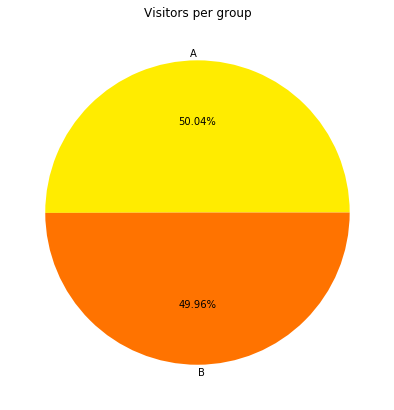

In [24]:
fig = plt.figure(figsize=[7, 7])
ax = fig.add_subplot(111)
ax.pie([2504, 2500], labels=['A', 'B'], colors=['#FFEC00','#FF7300'], autopct='%0.2f%%', labeldistance=1.05)
ax.set_title('Visitors per group')
plt.show()

## Step 6: Who picks up an application? 

Let us examine how many visitors filled the application form

In [32]:
#Adding a new column is_application, Application when application_date not NAT else No application
df['is_application'] = df['application_date'].apply(lambda x: 'Application' if pd.notnull(x) else 'No Application')
df.head()

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application
1000,Kim,Walter,female,KimWalter58@gmail.com,2017-07-01,2017-07-03,NaT,NaT,A,No Application
1001,Tom,Webster,male,TW3857@gmail.com,2017-07-01,2017-07-02,NaT,NaT,A,No Application
1002,Edward,Bowen,male,Edward.Bowen@gmail.com,2017-07-01,NaT,2017-07-04,2017-07-04,B,Application
1003,Marcus,Bauer,male,Marcus.Bauer@gmail.com,2017-07-01,2017-07-01,2017-07-03,2017-07-05,A,Application
1004,Roberta,Best,female,RB6305@hotmail.com,2017-07-01,2017-07-02,NaT,NaT,A,No Application


Let's count how many people from `Group A` and `Group B` either do or don't pick up an application

In [29]:
app_counts = df.groupby(['ab_test_group', 'is_application']).email.count().reset_index().rename(columns={'email':'count'})
app_pivot = app_counts.pivot(index = 'ab_test_group', columns = 'is_application', values='count').reset_index()
app_pivot['Total'] = app_pivot['Application'] + app_pivot['No Application']
app_pivot['Percent with Application'] = app_pivot['Application']/app_pivot['Total']
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


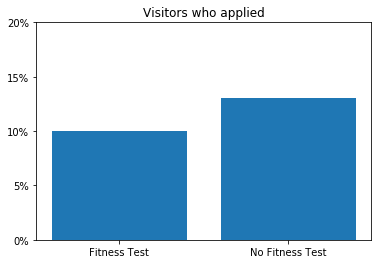

In [37]:
ax = plt.subplot()
plt.bar(range(len(app_pivot)),
       app_pivot['Percent with Application'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
ax.set_title('Visitors who applied')
plt.show()

It appears that visitors from `Group B` are more likely to fill out an application form. <br>
Let's confirm this by doing a hypothesis testing with a significance level of 0.05.<br>
`Null Hypothesis`: There is no significance difference between no. of applicants from `Group A` and `Group B`

In [30]:
#Performing chi square test
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(app_pivot[['Application', 'No Application']])
print(pval)

0.0009647827600722304


Since the <b>p value<0.05</b>, we can <b>reject</b> the null hypothesis and confirm that there is enough evidence to conclude that visitors who don't give a fitness test are more likely to fill out an application form.

## Step 7: Who purchases a membership?

In [33]:
#Adding a new column is_member, Member when purchase_date not NAT else Not Member
df['is_member'] = df['purchase_date'].apply(lambda x: 'Member' if pd.notnull(x) else 'Not Member')
df.head()

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
1000,Kim,Walter,female,KimWalter58@gmail.com,2017-07-01,2017-07-03,NaT,NaT,A,No Application,Not Member
1001,Tom,Webster,male,TW3857@gmail.com,2017-07-01,2017-07-02,NaT,NaT,A,No Application,Not Member
1002,Edward,Bowen,male,Edward.Bowen@gmail.com,2017-07-01,NaT,2017-07-04,2017-07-04,B,Application,Member
1003,Marcus,Bauer,male,Marcus.Bauer@gmail.com,2017-07-01,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
1004,Roberta,Best,female,RB6305@hotmail.com,2017-07-01,2017-07-02,NaT,NaT,A,No Application,Not Member


Let's count how many people from `Group A` and `Group B` purchased a membership

In [34]:
final_member = df.groupby(['ab_test_group', 'is_member']).email.count().reset_index().rename(columns={'email':'count'})
final_member_pivot = final_member.pivot(index='ab_test_group', columns='is_member', values='count').reset_index()
final_member_pivot['Total'] = final_member_pivot['Member'] + final_member_pivot['Not Member']
final_member_pivot['Percent Purchase'] = final_member_pivot['Member']/final_member_pivot['Total']
final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


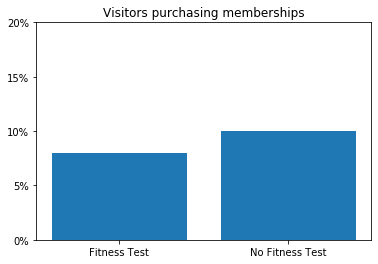

In [38]:
ax = plt.subplot()
plt.bar(range(len(final_member_pivot)),
       final_member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
ax.set_title('Visitors purchasing memberships')
plt.show()

It appears that visitors from `Group B` are more likely to buy a membership. <br>
Let's confirm this by doing a hypothesis testing with a significance level of 0.05.<br>
`Null Hypothesis`: There is no significance difference between purchases from `Group A` and `Group B`

In [36]:
#Performing chi square test
chi2, pval, dof, expected = chi2_contingency(final_member_pivot[['Member', 'Not Member']])
print(pval)

0.014724114645783203


Since the <b>p value<0.05</b>, we can <b>reject</b> the null hypothesis and confirm that there is enough evidence to conclude that visitors who don't give a fitness test are more likely to buy a membership.

## Conclusion 

Janet is right. Visitors who didn't have to give a fitness test are more likely to fill out an application form and then buy a membership compared to visitors who have to give a fitness test.